In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.animation as animation
plt.style.use(['dark_background'])

import numpy as np
import pandas as pd
import scipy.io as sio
from scipy.io import loadmat

import os

In [5]:
cell_data_path = r"C:\Users\zfj\data\quadpatch\Raw Data .mat"
raw_data_path = r"C:\Users\zfj\data\quadpatch\Raw Data .h5"
cell_id = "20221129Dcc3"

In [6]:
m = loadmat(os.path.join(cell_data_path, f"{cell_id}.mat"), squeeze_me=True, struct_as_record=False)
# m = loadmat(os.path.join(cell_data_path, f"{cell_id}.mat"), squeeze_me=True)#, struct_as_record=False)

In [7]:
def visit(f, depth=0):
    if type(f) == np.ndarray and f.dtype == object:
        for i,field in enumerate(f):
            print('\t'*depth, f"{i}:")
            visit(field, depth = depth + 1)
    elif type(f) == sio.matlab._mio5_params.mat_struct:
        for field in f._fieldnames:
            a = getattr(f,field)
            if type(a) == np.ndarray:
                astr = f"({len(a)})"
            else:
                astr = ""
            print('\t'*depth, field, astr)
            visit(a, depth = depth + 1)
    else:
        print('\t'*depth, f)

visit(m['data'])

 Stimulus (2)
	 0:
		 Name 
			 Light Step
		 Params 
			 NDF1 
				 5
			 NDF2 
				 4
			 Intensity 
				 0.2
			 RstarIntensity 
				 1997.152
			 MeanLevel 
				 0.1
			 RstarMeanLevel 
				 998.576
			 BackgroundSize 
				 1000
			 PreTime 
				 0.5
			 StimTime 
				 1
			 TailTime 
				 1
			 framesPerStep (0)
				 []
			 epochNum (10)
				 [ 1  2  3  4  5 16 17 18 19 20]
			 StagePosition (2)
				 [-291  827]
			 SpotSize 
				 340
		 RawData 
			 SplitParameter 
				 RstarIntensity
			 SplitValue 
				 1997.152
			 Data (4)
				 0:
					 0:
						 [   98   234   886  1080  1932  2410  3088  3287  4037  4562  4931  5101
  5253  5341  5528  5719  5777  5887  5938  5998  6101  6254  6504  6585
  6756  6876  7055  7197  7258  7438  7697  7861  8213  8310  8411  8609
  8829  8929  9103  9227  9768  9848 10118 10221 10701 11123 11390 11700
 11769 11869 12089 12454 12756 12851 13002 13184 13587 13771 14117 14237
 14402 14589 15194 15322 15525 18052 22696 23170 23991 24079 24178 24256

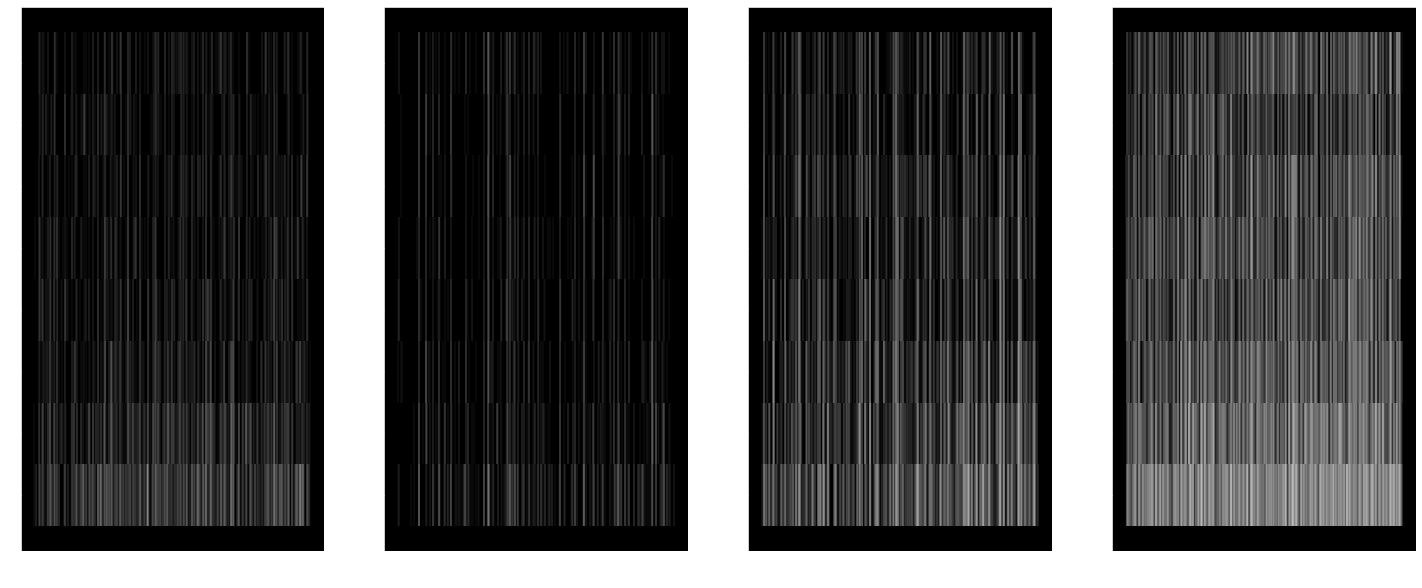

In [26]:
_,axs = plt.subplots(1,4,figsize=(25,10))
for i in range(4):
    for j in range(8):
        axs.flat[i].vlines(m['data'].Stimulus[1].RawData.Data[i][j],j-0.5,j+0.5, alpha=.05)

X,Y,intensity,startTime,endTime,diameter,flickerFrequency


(-110.0, 110.0, -103.56220453588912, 110.77908290075946)

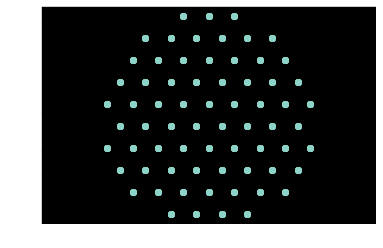

In [28]:
print(m['data'].Stimulus[1].Params.ShapeDataColumns[0])
m['data'].Stimulus[1].Params.ShapeDataMatrix[0]

#diam 23.5um, intensity 1, flicker none,

plt.scatter(m['data'].Stimulus[1].Params.ShapeDataMatrix[0][:,0], m['data'].Stimulus[1].Params.ShapeDataMatrix[0][:,1])
plt.axis('equal')

In [29]:
sd = np.concatenate([np.concatenate((sdm, i*np.ones((len(sdm),1))), axis=1) for i,sdm in enumerate(m['data'].Stimulus[1].Params.ShapeDataMatrix)], axis=0)
print(sd.shape)
u, ui = np.unique(sd[:,:2], axis = 0, return_inverse = True)
print(u.shape, ui.shape)

(2760, 8)
(69, 2) (2760,)


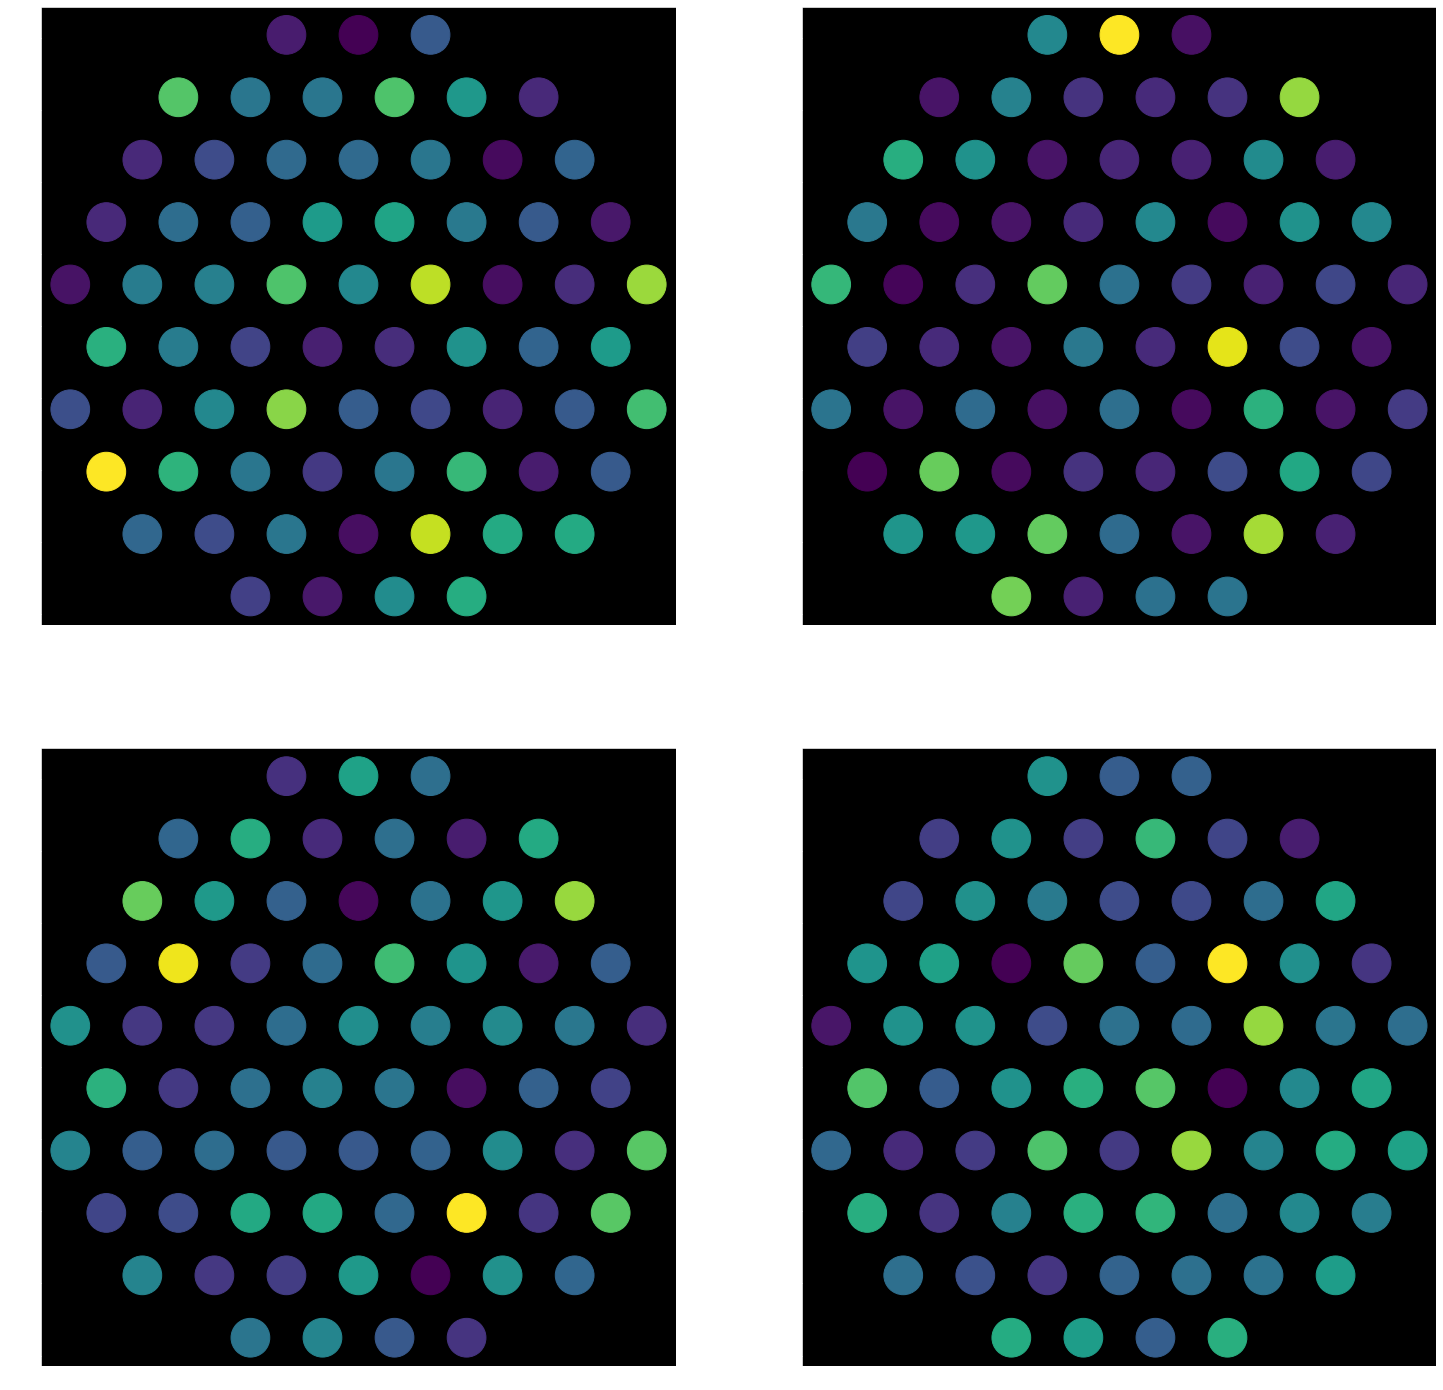

In [42]:
#plot the average spike count vs spot position

nt = np.empty((4, len(u)))
ns = np.zeros((4, len(u)))


rd = m['data'].Stimulus[1].RawData.Data

fig,axs = plt.subplots(2,2,figsize=(25,25))
axs = axs.flatten()
for j in [0,1,2,3]: #cells
    for i in range(len(u)):
        x,y = u[i]
        t0,tf = sd[ui==i,3:5].T
        ti = sd[ui==i,-1].astype(int)
        
        t0 = (t0*10000).astype(int) - 500 - 2500
        tf = (tf*10000).astype(int) + 2000 - 2500
        
        keep = t0 > 0
        t0 = t0[keep]
        tf = tf[keep]       
        
        nt[j][i] = len(t0)

        for tt0,ttf in zip(t0,tf):
            for k in range(8):
                # print(np.logical_and(rd[j][k] < ttf, rd[j][k] >= tt0).shape)
                ns[j][i] += np.count_nonzero(np.logical_and(rd[j][k] < ttf, rd[j][k] >= tt0))
    
    s = axs[j].scatter(u[:,0], u[:,1], 1500, ns[j]/nt[j], cmap='viridis')#, vmin=0, vmax=80)

# fig.colorbar(s, ax=axs, shrink=.95)